In [128]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of src.models.regression failed: Traceback (most recent call last):
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError

  0%|          | 0/16 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

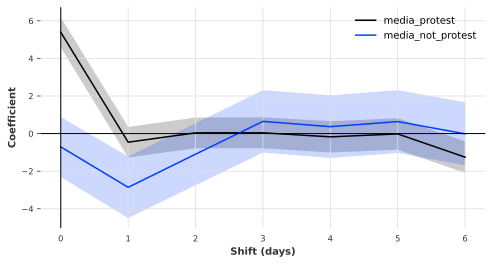

In [138]:
from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

lags = 7
steps = 7
gap = 7
var = "occ_FFF"
cum = False

results1 = regression(lags=lags, steps=steps, gap=gap, cumulative=cum)
results1.query("target=='media_protest' & predictor=='occ_FFF' & lag==0")

plot_lagged_impact(results1, var, "protest")

  0%|          | 0/16 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

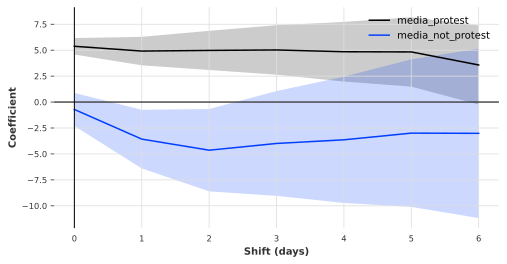

In [139]:
from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

lags = 7
steps = 7
gap = 7
var = "occ_FFF"
cum = True

results2 = regression(lags=lags, steps=steps, gap=gap, cumulative=cum)
results2.query("target=='media_protest' & predictor=='occ_FFF' & lag==0")

plot_lagged_impact(results2, var, "protest")

In [131]:
pd.set_option("display.max_rows", None)
results1.query("(target=='media_protest') & (step==1)")[
    ["predictor", "lag", "coef"]
].sort_values(["predictor", "lag"])

,predictor,lag,coef
706,SERIES0,0,5.403626
707,SERIES1,0,2.385649
708,SERIES10,0,-1.061411
709,SERIES11,0,-2.488476
710,SERIES12,0,-1.152576
711,SERIES13,0,-2.409915
712,SERIES2,0,-1.979164
713,SERIES3,0,-2.416979
714,SERIES4,0,-0.712224
715,SERIES5,0,3.780773


In [132]:
results2.query("(target=='media_protest') & (step==1)")[
    ["predictor", "lag", "coef"]
].sort_values(["predictor", "lag"])

,predictor,lag,coef
166,SERIES0,1,10.345656
167,SERIES1,1,4.356755
168,SERIES10,1,-1.979256
169,SERIES11,1,-4.738960
170,SERIES12,1,-2.189100
171,SERIES13,1,-4.569165
172,SERIES2,1,-3.764116
173,SERIES3,1,-4.558663
174,SERIES4,1,-1.389855
175,SERIES5,1,7.203187
